# **Types of Classification**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import plotly.express as px

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df = pd.DataFrame({
        'Feature1': X_test[:,0],
        'Feature2': X_test[:,1],
        'Feature3': X_test[:,2],
        'Actual': y_test,
        'Predicted': y_pred
    })
    fig = px.scatter_3d(df, x='Feature1', y='Feature2', z='Feature3',
                        color=df['Predicted']==df['Actual'],
                        symbol='Actual',
                        title=f"3D Predicted vs Actual: {name}")
    fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



# **1.Logistic Regression**

Idea: Draws a straight line (or plane) to separate classes.

Uniqueness: Works best when classes are roughly linearly separable.

Graph: The plane will cut the space into regions. Misclassifications happen if classes overlap.

Case Study: Email Spam Detection – emails often fall into two categories (spam vs not spam). Logistic regression is simple, interpretable, and often accurate enough for this task.

# **2.K-Nearest Neighbors (KNN)**

Idea: A new point looks at its nearest neighbors and joins the majority group.

Uniqueness: No training phase – decisions are made at prediction time.

Graph: Boundaries look irregular, wrapping around clusters of points. Outliers can confuse KNN.

Case Study: Movie Recommendation – if you liked movie A and B, KNN can recommend movie C if your neighbors with similar taste liked it too.

# **3.Support Vector Machine (SVM)**

Idea: Finds the “widest street” that separates classes, maximizing margin.

Uniqueness: Can transform features using kernels to handle complex boundaries.

Graph: Often creates clean divisions between groups, even in tough spaces. Misclassifications occur when classes overlap too much.

Case Study: Handwriting Recognition – SVMs are great at recognizing handwritten digits because they maximize separation between digits.

# **4.Decision Tree**

Idea: Asks yes/no questions about features to classify step by step.

Uniqueness: Easy to understand and visualize, but can overfit.

Graph: Boundaries look like boxy partitions, because splits happen feature by feature.

Case Study: Loan Approval – A decision tree can use rules like “Is income > X?” → “Does credit score > Y?” to decide approvals.

# **5.Random Forest**

Idea: Builds many decision trees and takes a majority vote.

Uniqueness: Reduces overfitting and improves accuracy.

Graph: Looks smoother than a single tree, because many trees average out.

Case Study: Medical Diagnosis – Random Forests are widely used to classify diseases based on patient data, reducing the bias of a single decision tree.

# **6.Naive Bayes**

Idea: Uses probability + Bayes’ Theorem, assuming features are independent.

Uniqueness: Very fast and works surprisingly well for text.

Graph: Predictions are based on likelihoods; boundaries may look simple but effective.

Case Study: SMS Spam Filtering – Words like “free”, “win”, “prize” have high spam probability, making Naive Bayes perfect for this job.

# **7.Neural Network (MLP)**

Idea: Mimics brain neurons with layers and activation functions.

Uniqueness: Can learn very complex decision boundaries.

Graph: Boundaries look wiggly and adaptive, fitting complex shapes in the data.

Case Study: Image Recognition (Cats vs Dogs) – neural networks can capture very complex patterns like fur, ears, and shapes to separate classes.

# 📊 Common Evaluation Metrics for Classification

When we train a classification model, we need to measure **how good it is**. These metrics are based on the **confusion matrix**, which shows predictions vs actual results:

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

---

### 1. Accuracy
- **Definition:**  
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
- **What it means:** The fraction of predictions the model got correct.  
- **Good when:** Classes are balanced.  
- **Bad when:** Dataset is imbalanced.

---

### 2. Precision
- **Definition:**  
$$Precision = \frac{TP}{TP + FP}$$
- **What it means:** Out of all positive predictions, how many were actually correct?  
- **Use case:** When **false positives are costly**.  
- **Example:** In spam detection, high precision = very few genuine emails marked as spam.  

---

### 3. Recall (Sensitivity / True Positive Rate)
- **Definition:**  
$$Recall = \frac{TP}{TP + FN}$$
- **What it means:** Out of all actual positives, how many did we catch?  
- **Use case:** When **false negatives are costly**.  
- **Example:** In disease detection, recall matters — better to catch all patients, even if some healthy people are misclassified.

---

### 4. F1 Score
- **Definition:** Harmonic mean of precision & recall:  
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
- **What it means:** A balance between precision and recall.  
- **Use case:** When we want a trade-off between catching positives and avoiding false alarms.

---

### 5. ROC Curve & AUC (Area Under the Curve)
- **ROC Curve:** Plots **True Positive Rate (Recall)** vs **False Positive Rate** at different thresholds.  
- **AUC:** Measures the overall ability of the model to separate classes.  
- **Good AUC:** Closer to **1.0** = better.  
- **Use case:** Comparing classifiers on imbalanced datasets.

---

### 6. Log Loss (Cross-Entropy Loss)
- **Definition:** Measures how close the predicted probabilities are to the actual labels.  
- **Formula:**  
$$LogLoss = -\frac{1}{N}\sum [y \log(p) + (1-y)\log(1-p)]$$
- **What it means:** Penalizes confident wrong predictions heavily.  
- **Use case:** When probability calibration matters (e.g., predicting “70% chance of rain”).

---

### 7. Specificity (True Negative Rate)
- **Definition:**  
$$Specificity = \frac{TN}{TN + FP}$$
- **What it means:** Out of all actual negatives, how many did we correctly classify?  
- **Use case:** When it’s important to avoid false alarms.  
- **Example:** In medical screening, specificity ensures we don’t misdiagnose healthy people as sick.

---

### 8. Cohen’s Kappa
- **Definition:** Compares model accuracy to chance-level accuracy.  
- **What it means:** How much better is the model compared to random guessing.  
- **Use case:** Multi-class classification with imbalanced data.

---

✨ **Summary for Beginners:**  
- **Accuracy** = overall correctness.  
- **Precision** = "When I said positive, was I right?"  
- **Recall** = "Did I find all the positives?"  
- **F1** = balance of precision & recall.  
- **AUC** = how well model separates classes.  
- **Log Loss** = how good predicted probabilities are.  
- **Specificity** = "How well did I catch the negatives?"  


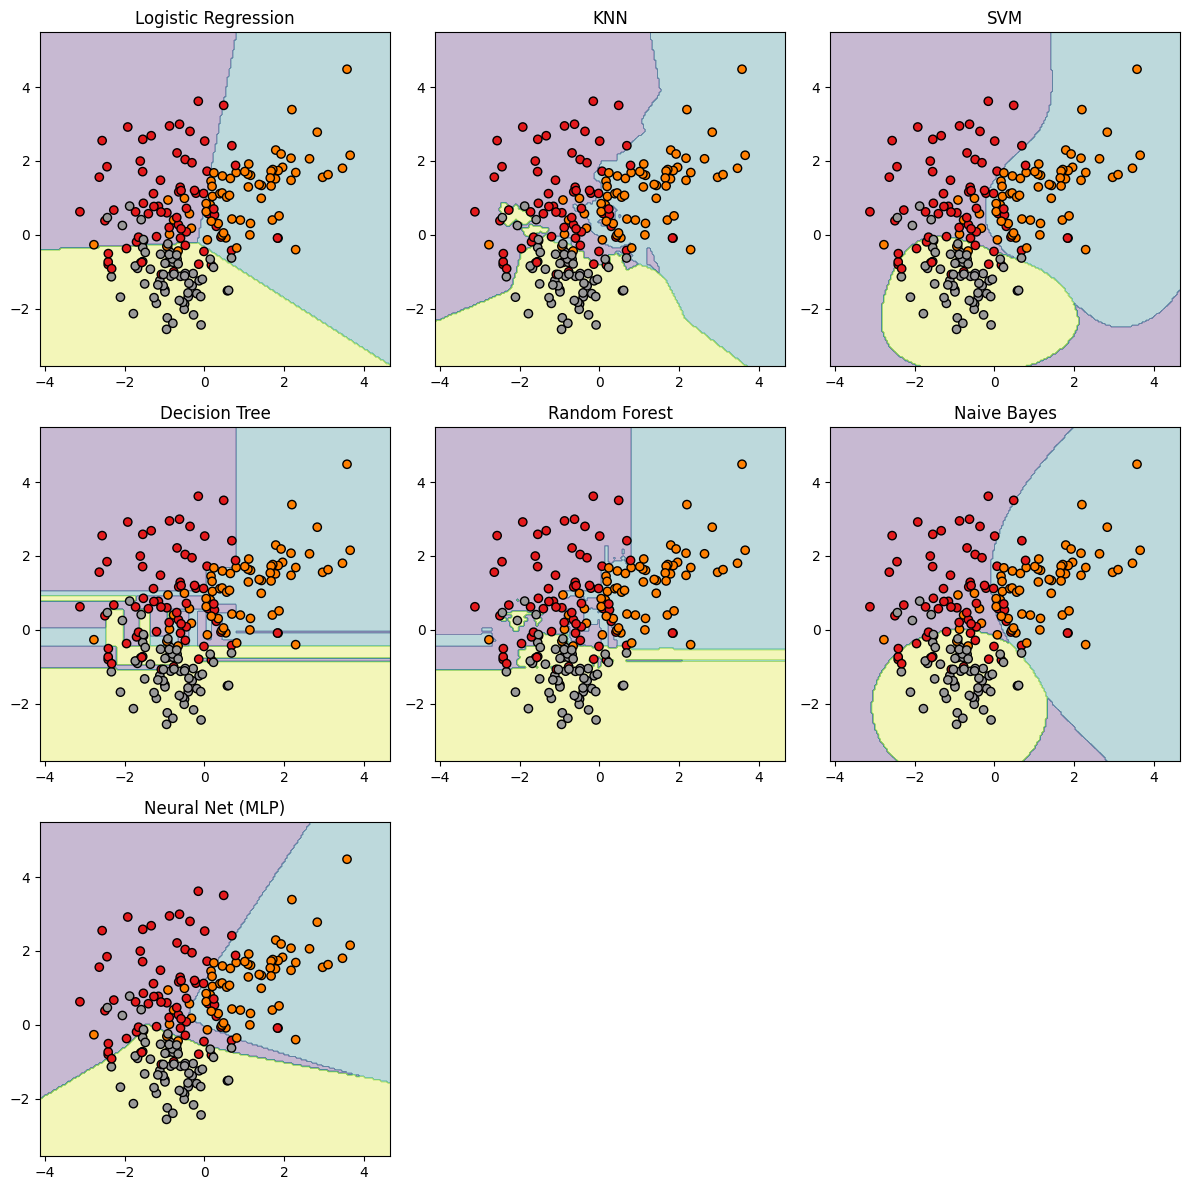

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Generate simple 2D dataset for easy visualization
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, n_classes=3, n_clusters_per_class=1,
    random_state=42
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Net (MLP)": MLPClassifier(max_iter=1000)
}

# Set up plot grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Create mesh for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Plot each model
for i, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3)  # decision boundary
    scatter = axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    axes[i].set_title(name)

# Remove empty subplot
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Logistic Rgression

A straight line used for classifying

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show first 5 rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9883040935672515

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

